In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")
print("libraries import successfully")

libraries import successfully


In [2]:
import pandas as pd
df_raw=pd.read_csv(r"C:\Users\DELL\Desktop\New folder\uber.csv", low_memory=False, nrows=10**5,parse_dates=['pickup_datetime'])
df_raw.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5


In [3]:
#printing dataset view
print("dataset view :",df_raw.shape)

dataset view : (100000, 9)


In [4]:
#creating datetime view based on datetime
import calendar
df_raw['pickup_day']=df_raw['pickup_datetime'].apply(lambda x:x.day)
df_raw['pickup_hour']=df_raw['pickup_datetime'].apply(lambda x:x.hour)
df_raw['pickup_day_of_week'] = df_raw['pickup_datetime'].apply(lambda x: x.day_name())
df_raw['pickup_month']=df_raw['pickup_datetime'].apply(lambda x:x.month)
df_raw['pickup_year']=df_raw['pickup_datetime'].apply(lambda x:x.year)
df_raw.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,7,19,Thursday,5,2015
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,17,20,Friday,7,2009
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,24,21,Monday,8,2009
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,26,8,Friday,6,2009
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,28,17,Thursday,8,2014


In [5]:
#analyzing the data
df_raw.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_hour,pickup_month,pickup_year
count,1.000000e+05,100000.000000,100000.000000,100000.000000,99999.000000,99999.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000
mean,2.771419e+07,11.380700,-72.523111,39.951140,-72.544076,39.920702,1.67748,15.710160,13.482440,6.270370,2011.746250
std,1.601754e+07,9.905953,11.613982,9.064410,15.348821,7.300712,1.29866,8.695609,6.519983,3.438422,1.859004
min,4.800000e+01,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.00000,1.000000,0.000000,1.000000,2009.000000
25%,1.382442e+07,6.000000,-73.992027,40.734833,-73.991414,40.733707,1.00000,8.000000,9.000000,3.000000,2010.000000
50%,2.776430e+07,8.500000,-73.981810,40.752623,-73.980093,40.752957,1.00000,16.000000,14.000000,6.000000,2012.000000
75%,4.154586e+07,12.500000,-73.967159,40.767152,-73.963776,40.768082,2.00000,23.000000,19.000000,9.000000,2013.000000
max,5.542285e+07,350.000000,57.418457,1644.421482,1153.572603,872.697628,6.00000,31.000000,23.000000,12.000000,2015.000000


In [6]:
#looking for null values
df_raw.isnull().sum()

Unnamed: 0            0
key                   0
fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     1
dropoff_latitude      1
passenger_count       0
pickup_day            0
pickup_hour           0
pickup_day_of_week    0
pickup_month          0
pickup_year           0
dtype: int64

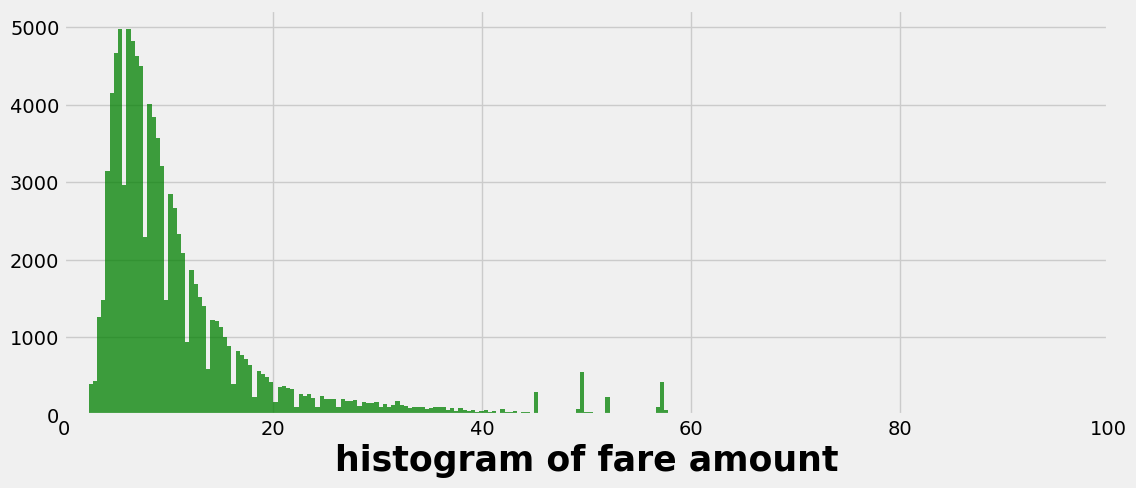

In [7]:
#visualising the target
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
n,bins,patches=plt.hist(df_raw.fare_amount,999,facecolor='green',alpha=0.75)
plt.xlabel('fare_amount',fontsize=15,fontweight='bold')
plt.xlabel('histogram of fare amount',fontsize=25,fontweight='bold')
plt.xlim(0,100)
plt.show();

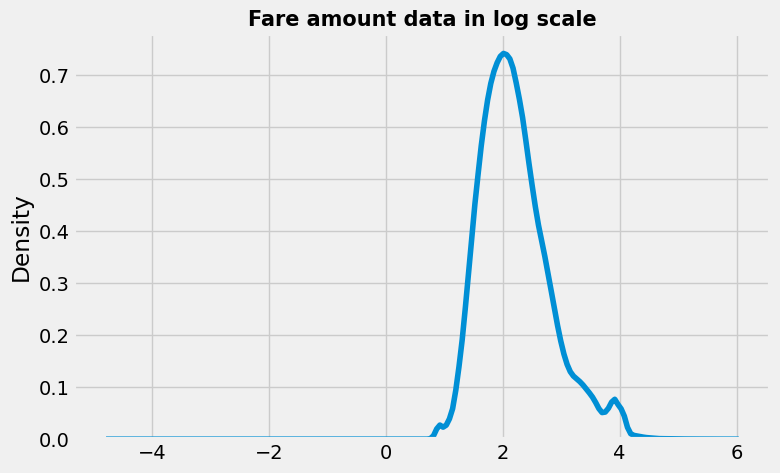

In [8]:
#How data looks in log scale
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.figure(figsize=(8,5))
sns.kdeplot(np.log(df_raw['fare_amount'].values)).set_title("Fare amount data in log scale",fontsize=15,fontweight='bold');
plt.show()

In [9]:
#Analysing fare amount
df_raw['fare_amount'].value_counts(normalize=True).iloc[:5]

fare_amount
6.5    0.04773
4.5    0.04119
8.5    0.03801
5.3    0.02939
5.7    0.02921
Name: proportion, dtype: float64

In [10]:
#Passenger visualisation
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
df_raw['passenger_count'].value_counts().plot.bar(color='blue',edgecolor='k')
plt.title('Histogram of passenger counts',fontsize=25,fontweight='bold')
plt.xlabel('passenger_count',fontsize='15',fontweight='bold')
plt.ylabel('count',fontsize='15',fontweight='bold')

Text(0, 0.5, 'count')

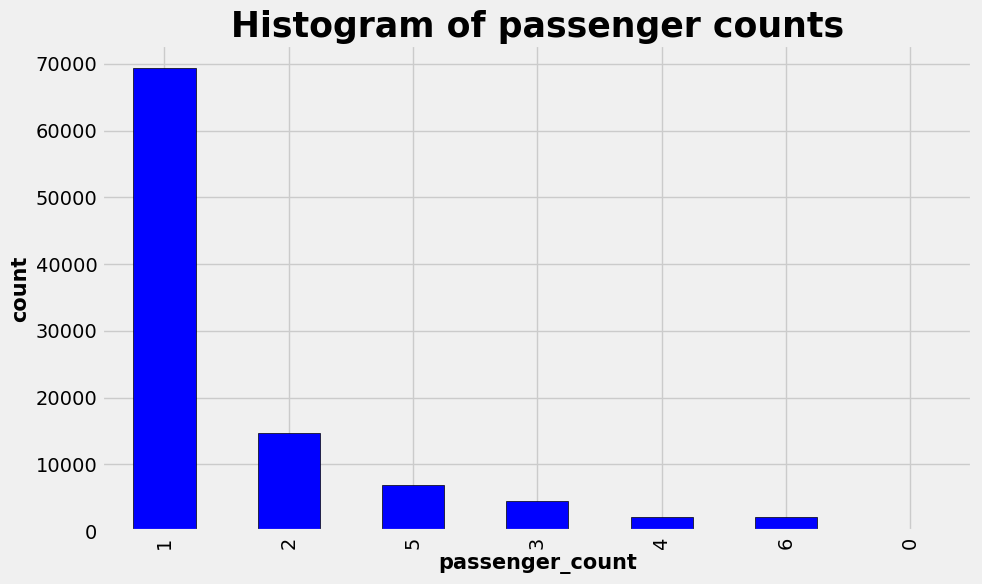

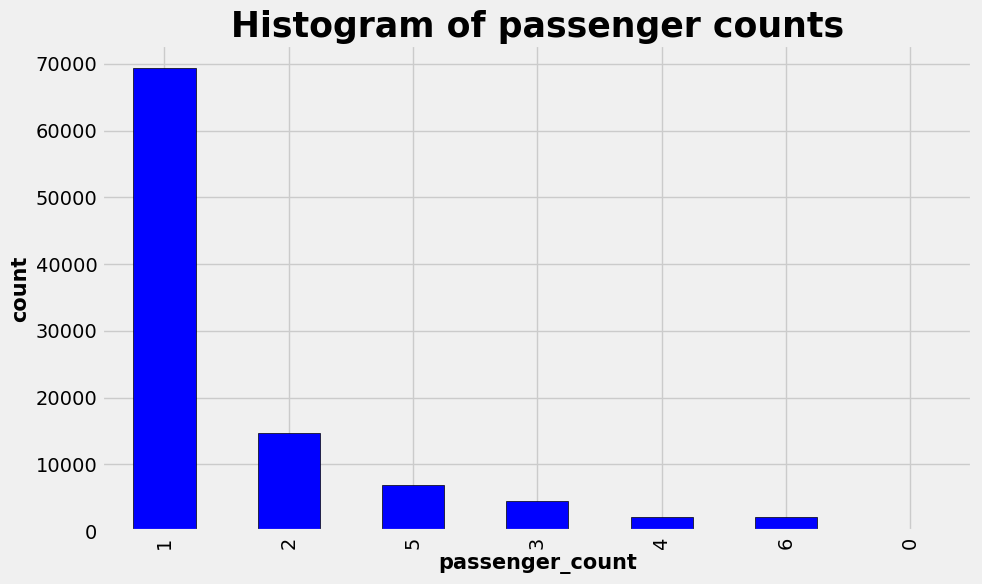

In [11]:
#Passenger visualisation
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
df_raw['passenger_count'].value_counts().plot.bar(color='blue',edgecolor='k')
plt.title('Histogram of passenger counts',fontsize=25,fontweight='bold')
plt.xlabel('passenger_count',fontsize='15',fontweight='bold')
plt.ylabel('count',fontsize='15',fontweight='bold')
plt.show()

In [12]:
#Analysing passenger number
import pandas as pd
df_raw['passenger_count'].value_counts()

passenger_count
1    69310
2    14754
5     6925
3     4477
4     2118
6     2067
0      349
Name: count, dtype: int64

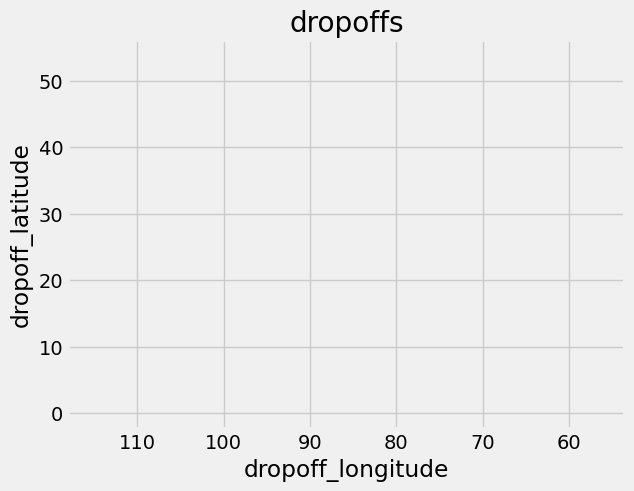

In [13]:
#creating map of pickup
import pandas as pd
import matplotlib.pyplot as plt
city_long_border=(118,53.51)
city_lat_border=(-2.32,56.13)
df_raw=pd.read_csv(r"C:\Users\DELL\Desktop\New folder\uber.csv")
df_raw.plot(kind='scatter',x='dropoff_longitude',y='dropoff_latitude',color='y',s=.02,alpha=.6)
plt.title("dropoffs")
plt.ylim(city_lat_border)
plt.xlim(city_long_border)
plt.show()

In [14]:
#calculating path distance
import os
def distance(lat1,lon1,lat2,lon2):
    p=0.017453292519943295
    a=0.5-np.cos((lat2-lat1)*p)/2+np.cos(lat1*p)*np.cos(lat2*p)*(1-np.cos((lon2-lon1)*p))/2
    return 0.6213712*12742*np.arcsin(np.sqrt(a))
#Now adding column for path distance in a dataframe
df_raw['path_distance']=distance(df_raw.pickup_latitude,df_raw.pickup_longitude,df_raw.dropoff_latitude,df_raw.dropoff_longitude)
df_raw.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,path_distance
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1.045968
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,1.527076
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,3.129460
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1.032522
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,2.780916


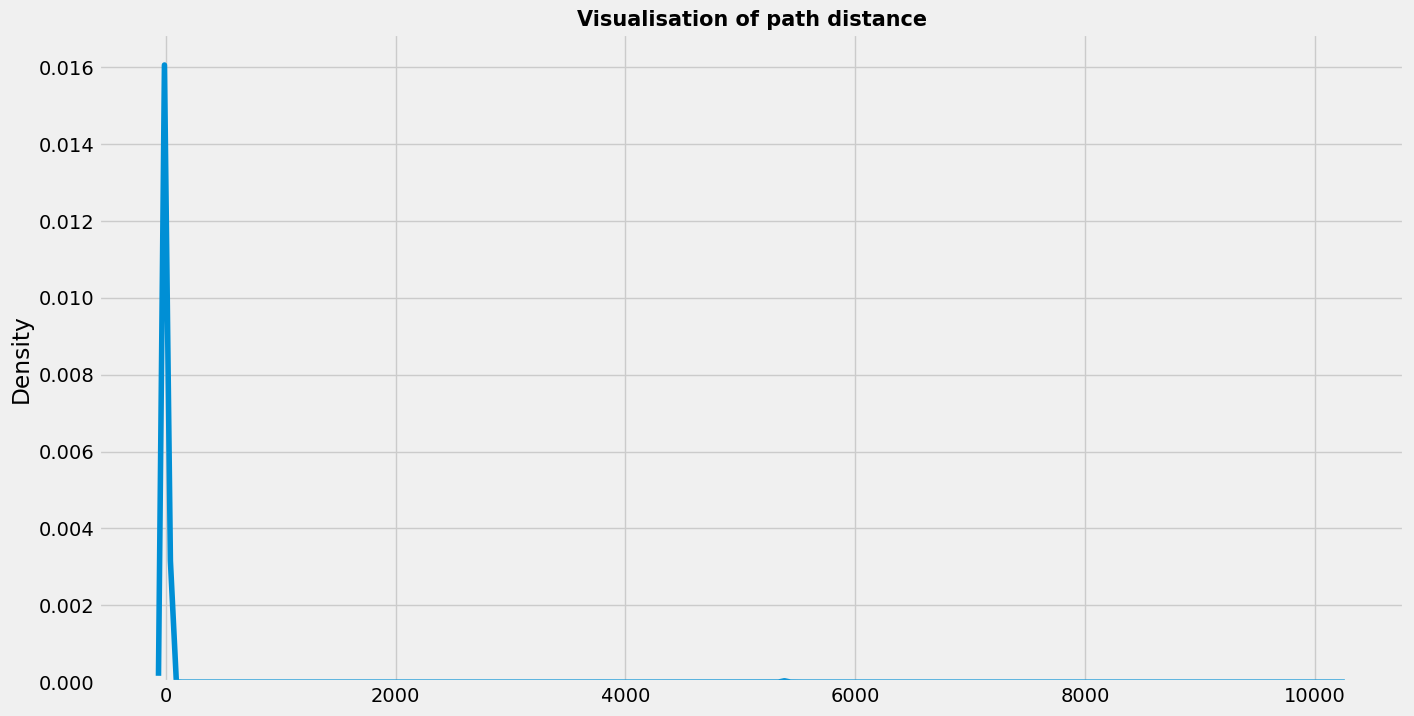

In [15]:
plt.figure(figsize=(15,8))
sns.kdeplot(df_raw['path_distance'].values).set_title("Visualisation of path distance",fontsize='15',fontweight='bold')
plt.show()

In [16]:
import folium
import pandas as pd

# Create the map centered at a specific location
pickup_locations = folium.Map(location=[-2.32, 118], tiles='openstreetmap', zoom_start=12)

# Example DataFrame for demonstration; replace with your actual data
data = {
    'pickup_latitude': [-6.21, -6.22, -6.23, -6.24],
    'pickup_longitude': [106.81, 106.82, 106.83, 106.84]
}
df_raw = pd.DataFrame(data)

# Add circle markers for the first 500 pickup locations
for each in df_raw[:500].iterrows():
    folium.CircleMarker(
        location=[each[1]['pickup_latitude'], each[1]['pickup_longitude']],
        radius=5,  # Size of the circle
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(pickup_locations)

# Save the map to an HTML file or display it in a Jupyter Notebook
pickup_locations.save('pickup_locations_map.html')
pickup_locations


In [17]:
df_cool=df_raw.copy()
df_cool.head()

,pickup_latitude,pickup_longitude
0,-6.21,106.81
1,-6.22,106.82
2,-6.23,106.83
3,-6.24,106.84


In [18]:
print(df_cool.columns)


Index(['pickup_latitude', 'pickup_longitude'], dtype='object')


In [19]:
df_cool.columns = df_cool.columns.str.strip()


In [20]:
print(df_cool.head())
print(df_cool.info())


   pickup_latitude  pickup_longitude
0            -6.21            106.81
1            -6.22            106.82
2            -6.23            106.83
3            -6.24            106.84
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pickup_latitude   4 non-null      float64
 1   pickup_longitude  4 non-null      float64
dtypes: float64(2)
memory usage: 196.0 bytes
None


In [21]:
print(df_cool.columns)


Index(['pickup_latitude', 'pickup_longitude'], dtype='object')


In [22]:
df_cool.rename(columns={'fare amount ': 'fare_amount'}, inplace=True)  # Example with formatting


In [23]:
df_cool = pd.read_csv(r"C:\Users\DELL\Desktop\New folder\uber.csv")
print(df_cool.columns)


Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')


In [24]:
if 'fare_amount' not in df_cool.columns:
    raise KeyError("Column 'fare_amount' not found in the DataFrame. Please verify the column names.")
else:
    x = df_cool.drop(columns=['fare_amount'], axis=1)
    y = df_cool['fare_amount']


In [25]:
# Splitting features and target variable
x = df_cool.drop(columns=['fare_amount'], axis=1)
y = df_cool['fare_amount']

# Splitting into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Display the shapes
print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of x_train: (140000, 8)
Shape of x_test: (60000, 8)
Shape of y_train: (140000,)
Shape of y_test: (60000,)


In [54]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.impute import SimpleImputer, MissingIndicator
from sklearn.model_selection import train_test_split
from sklearn.pipeline import FeatureUnion, make_pipeline
from sklearn.tree import DecisionTreeClassifier

# Load dataset and introduce NaNs
X, y = load_iris(return_X_y=True)
mask = np.random.randint(0, 2, size=X.shape).astype(bool)
X[mask] = np.nan

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print prompt for user inputs
print("Enter your information to predict fare:")
pickup_coordinates = str(input("Enter pickup coordinates (latitude,longitude): "))
dropoff_coordinates = str(input("Enter dropoff coordinates (latitude,longitude): "))
pickup_latitude = float(pickup_coordinates.split(',')[0])
pickup_longitude = float(pickup_coordinates.split(',')[1])
dropoff_latitude = float(dropoff_coordinates.split(',')[0])
dropoff_longitude = float(dropoff_coordinates.split(',')[1])
enter_date = input("Enter the date (DD/MM/YYYY): ")
passenger_count = int(input("Enter number of passengers: "))
pickup_day = int(enter_date.split('/')[0])
pickup_hour = int(input('Enter pickup hour: '))

# Distance calculation
def distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295  # Pi/180
    a = (0.5 - np.cos((lat2 - lat1) * p) / 2 +
         np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p)) / 2)
    return 0.6213712 * 12742 * np.arcsin(np.sqrt(a))

path_distance = distance(pickup_latitude, pickup_longitude, dropoff_latitude, dropoff_longitude)

# Prepare user input array
my_array = np.array([[pickup_latitude, pickup_longitude, dropoff_latitude, dropoff_longitude]])

# Create pipeline components
numeric_transformer = SimpleImputer(strategy='mean')
transformer = FeatureUnion([
    ('features', numeric_transformer),
    ('indicators', MissingIndicator())
])

# Transform training and test data
X_train_transformed = transformer.fit_transform(X_train)
X_test_transformed = transformer.transform(X_test)

# Train a decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train_transformed, y_train)

# Ensure input has the correct shape
my_array_transformed = transformer.transform(my_array)

# Make a prediction
predicted_fare = clf.predict(my_array_transformed)
print('Predicted fare amount[$]:', predicted_fare[0])


Enter your information to predict fare:


Enter pickup coordinates (latitude,longitude):  -7.78031,110.414113
Enter dropoff coordinates (latitude,longitude):  -7.79247,110.36600
Enter the date (DD/MM/YYYY):  06/01/2023
Enter number of passengers:  2
Enter pickup hour:  2


Predicted fare amount[$]: 2
